<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.
# 가중치의 절댓값을 가능한 한 작게 만드는 것이다. (w의 모든 원소가 0에 가깝게 되길 원함)
# 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게 만든다)
# 이런 제약을 규제(Regularization)이라 한다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.
# 릿지 회귀에 사용하는 규제 방식을 L2 규제라고 한다.
# 아래에서 릿지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살펴본다.

In [4]:
!pip install mglearn


import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import mglearn

X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

# 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높다.
# 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.

########모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다.######
#관심 있는 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression보다 Ridge 모델을 선택해야 한다.
# alpha를 크게 하면 페널티의 효과가 커진다(가중치 감소) 위 예제에선 alpha=1.0을 사용
# 아주 작은 ahpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아진다. (alpha=0.00001로 지정하면 LinearRegression에서 얻은 점수와 완전 같게 됨)
print('\n')
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train,y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))
print('\n')

# 아주 작은 ahpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아진다. (alpha=0.00001로 지정하면 LinearRegression에서 얻은 점수와 완전 같게 됨)
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))

# alpha=0.1이 꽤 좋은 성능을 냈다. test set에 대한 성능이 높아질때까지 alpha 값을 줄일 수 있을 것이다.

훈련 세트 점수: 0.89
훈련 세트 점수: 0.75


훈련 세트 점수: 0.79
훈련 세트 점수: 0.64


훈련 세트 점수: 0.93
훈련 세트 점수: 0.77


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


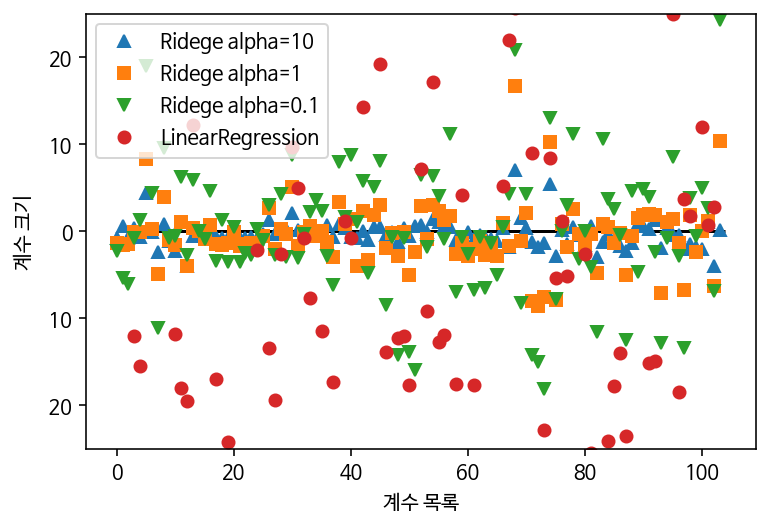

In [7]:
# 높은 alpha 값은 제약이 더 많은 모델이므로 coef_의 절댓값 크기가 작을 것이라고 예상할 수 있다.
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
plt.plot(ridge10.coef_,'^',label="Ridege alpha=10")
plt.plot(ridge.coef_,'s',label="Ridege alpha=1")

plt.plot(ridge01.coef_,'v',label="Ridege alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치한다.
# alpha가 작아질수록 계수는 커지며 아무런 규제가 없는 alpha=0 선형 회귀의 계수는 그림 밖으로 넘어간다.


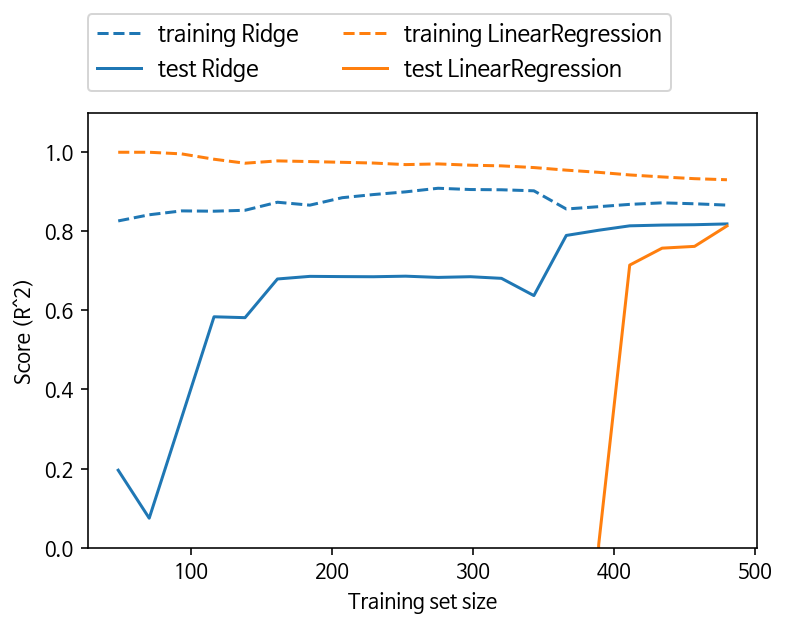

In [8]:
# 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것이다.
############# 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(learning curve)라고 한다.############# 훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에서는 반복의 횟수에 따른 성능 변화를 나타내는 그래프를 학습 곡선이라 함
# 아래 그림은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용 것이다.
mglearn.plots.plot_ridge_n_samples()
# 릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.
# 그러나 테스트 데이터에서는 릿지의 점수다 더 높으며 특별히 작은 데이터셋에서는 더 그렇다.
# 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고 있다.
# 두 모델의 성능은 데이터가 많아질수록 좋아지고 ######마지막에는 선형회귀가 릿지 회귀를 따라잡는다.#####
# 여기서 배울 수 있는 것은 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이라는 점이다.
# 또한 선형 회귀의 훈련 데이터 성능이 감소한다. 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.